In [1]:
import numpy as np
import pandas as pd

In [2]:
#Reading Data and column names to it
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
 "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
 "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
 "peak-rpm","city-mpg","highway-mpg","price"]
df=pd.read_csv('C:/Users/nived/Downloads/auto.csv',names=headers)

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Replacing the ? marks in the column with nan valves
obj_cols = df.select_dtypes('object').columns
for obj in obj_cols:
    df[obj] = df[obj].replace("?", np.nan)

In [6]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
# Overall dataframe shape
df.shape

(205, 26)

In [10]:
# Shape of the dataframe after subsetting on the price column
df=df.dropna(subset=["price"])
df.shape

(201, 26)

In [11]:
# to remove null values and replace it with the mean values of the repective column 
int_cols_tochange = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']
df[int_cols_tochange] = df[int_cols_tochange].astype('float64')
df[int_cols_tochange] = df[int_cols_tochange].fillna(df[int_cols_tochange].mean())
df[int_cols_tochange].isnull().sum()

normalized-losses    0
bore                 0
stroke               0
horsepower           0
peak-rpm             0
dtype: int64

In [12]:
#Repacing the no of doors column with its mode value
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [13]:
#Droping the index of the dataframe
df = df.reset_index(drop=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [15]:
# Data Types of the variables
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [16]:
# Changing the data type of the price column from object  to the int
df['price']=df['price'].astype('int64')

In [17]:
# Counting the no of values under the column no of cylinders
df['num-of-cylinders'].value_counts()

four      157
six        24
five       10
eight       4
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [18]:
# changing the value to digits for the num of cylinders column
def get_num_of_cylinders(cylinders):
    switcher = {
        'four': 4,
        'six': 6,
        'five': 5,
        'two': 2,
        'eight': 8,
        'three': 3,
        'twelve': 12
    }
    return (switcher.get(cylinders, 0))

df['num-of-cylinders'] = df['num-of-cylinders'].apply(lambda x: get_num_of_cylinders(x)).astype('int')
df['num-of-cylinders'].value_counts()

4     157
6      24
5      10
8       4
2       4
12      1
3       1
Name: num-of-cylinders, dtype: int64

In [19]:
#  Adding 2 different column to the dataframe using the user defined formula using the columns pre defined
# 1) City-L/100 km = 235/city-mpg
# 2) highway-L/100 km =235/highway-mpg
df['city-L/100km'] = 235 / df['city-mpg']
df['highway-L/100km'] = 235 / df['highway-mpg']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.055556,10.681818


In [21]:
lewihe_cols = ['length', 'width', 'height']
df[lewihe_cols] = df[lewihe_cols]/df[lewihe_cols].max()
df[lewihe_cols].describe()

,length,width,height
count,201.000000,201.000000,201.000000
mean,0.837102,0.915126,0.899108
std,0.059213,0.029187,0.040933
min,0.678039,0.837500,0.799331
25%,0.801538,0.890278,0.869565
50%,0.832292,0.909722,0.904682
75%,0.881788,0.925000,0.928094
max,1.000000,1.000000,1.000000


In [23]:
import matplotlib.pyplot  as plt
%matplotlib inline


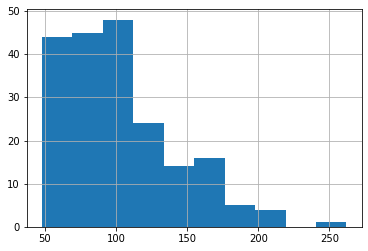

In [24]:
# Creating an histogram for the horsepower
df['horsepower'].hist()

In [25]:
#Applying the describe function on the horsepower
df['horsepower'].describe()

count    201.000000
mean     103.396985
std       37.365602
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: horsepower, dtype: float64

In [26]:
#Giving labels to the horsepower-binned to make a graph 
labels = ['Low','Medium','High']
df['horsepower-binned'] = pd.qcut(df['horsepower'], q=3, labels=labels)
df['horsepower-binned'].value_counts()

Low       68
Medium    67
High      66
Name: horsepower-binned, dtype: int64

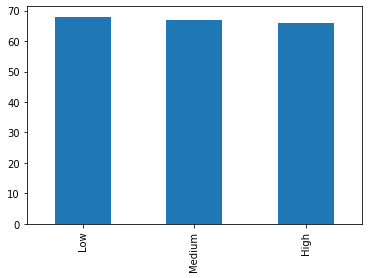

In [27]:
#Graph of horsepower-binned
df['horsepower-binned'].value_counts().plot(kind='bar')

In [28]:
# Dropping the columns which are not necessary and then according to the categorical values get dummies for both the fuel types and aspiration
ocols = ['fuel-type', 'aspiration']
df = pd.concat([df.drop(ocols, axis=1), pd.get_dummies(df[ocols])], axis=1)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495,11.190476,8.703704,Medium,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500,11.190476,8.703704,Medium,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500,12.368421,9.038462,High,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950,9.791667,7.833333,Medium,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450,13.055556,10.681818,High,0,1,1,0
